# Lecture 6) Regression Trees & Classification Trees

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn as sl

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn import neighbors
from sklearn.model_selection import cross_val_score
from sklearn import linear_model

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor


%matplotlib inline
import scipy as sc
import math as ma
from scipy import linalg, optimize, constants, interpolate, special, stats
from math import exp, pow, sqrt, log

import seaborn as sns #spezielle Graphikdarstellungen
import statsmodels.api as sm
import statsmodels.stats.api as sms


Wir haben in der Vorlesung gesehen, daß sich Trees sowohl für Regressions- als auch für Klassifikationsaufgaben eignen.  
Wichtig ist nur die geeignete Metrik, und daß man sich um das Problem des Overfitting kümmert.
Denn das ist bei den Tree-basierten Verfahren meistens das Hauptproblem.

Wir starten mit der Regressionsaufgabe, die wir schon in Lecture 5) benutzt haben: der Auto-Datensatz.

## 6.1) Regression-Trees

Als erstes laden wir den schon bekannten Datensatz.
Zielgröße ist der Benzinverbrauch (mpg) und außer dem Namen des Fahrzeugs und dem Ursprung (name & origin) benutzen wir alle verfügbaren Größen.

In [2]:
Auto = pd.read_csv("../Daten/Auto.csv")
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
X=np.array(Auto[['cylinders','displacement','horsepower','weight','acceleration','year']])
y=np.array(Auto['mpg'])


In [4]:
print(np.shape(X),np.shape(y))

(397, 6) (397,)


Jetzt teilen wir die Daten erstmal (klassisch :-)) in eine Trainings- und eine Testmenge und skalieren sie mit einem MinMax Scaler, damit die Wertebereiche der erklärenden Größen nicht zu unterschiedlich ausfallen.

In [5]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle='True')

In [6]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
print(np.shape(X_train),np.shape(X_test))
print(np.max(X_train),np.min(X_train))
print(np.max(X_test),np.min(X_test))

(277, 6) (120, 6)
1.0 0.0
1.0441085749537322 -0.04380012338062916


## 6.1.1) Einfacher Regression Tree

Einen ersten ganz einfachen Decision Tree mit einer festgelegten maximalen Tiefe kann man ganz einfach mit Sklearn umsetzen. Der Algorithmus benutzt den RMSE als Fehlermaß (optional auch andere z.B. MAE).

In [8]:
from sklearn.tree import DecisionTreeRegressor

# Modell spezifizieren (max. Tiefe = 3)
auto_tree=DecisionTreeRegressor(max_depth=3)

# Modell an die Trainingsdaten anpassen
auto_tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [9]:
y_hat_train = auto_tree.predict(X_train)
y_hat_test = auto_tree.predict(X_test)
y_hat_test

array([35.72142857, 35.72142857, 28.51388889, 23.375     , 23.375     ,
       14.08196721, 27.47083333, 28.51388889, 14.08196721, 23.375     ,
       27.47083333, 23.375     , 23.375     , 35.72142857, 24.46666667,
       18.76981132, 23.375     , 23.375     , 18.31      , 35.72142857,
       14.08196721, 35.72142857, 18.76981132, 18.76981132, 35.72142857,
       35.72142857, 35.72142857, 14.08196721, 28.51388889, 27.47083333,
       23.375     , 35.72142857, 24.46666667, 23.375     , 24.46666667,
       35.72142857, 35.72142857, 23.375     , 35.72142857, 18.31      ,
       18.76981132, 18.76981132, 23.375     , 18.76981132, 27.47083333,
       14.08196721, 27.47083333, 35.72142857, 35.72142857, 27.47083333,
       27.47083333, 14.08196721, 23.375     , 14.08196721, 28.51388889,
       14.08196721, 18.76981132, 24.46666667, 23.375     , 27.47083333,
       28.51388889, 35.72142857, 35.72142857, 23.375     , 23.375     ,
       14.08196721, 27.47083333, 14.08196721, 14.08196721, 28.51

In [10]:
rmseTree_tr = sqrt(mean_squared_error(y_hat_train,y_train)) 
rmseTree_test = sqrt(mean_squared_error(y_hat_test,y_test)) 

print('Trainingsfehler:',rmseTree_tr)
print('Testfehler:',rmseTree_test)

Trainingsfehler: 3.046341860534951
Testfehler: 3.3346560225174073


Die Struktur des Baumes läßt sich auch graphisch ausgeben:

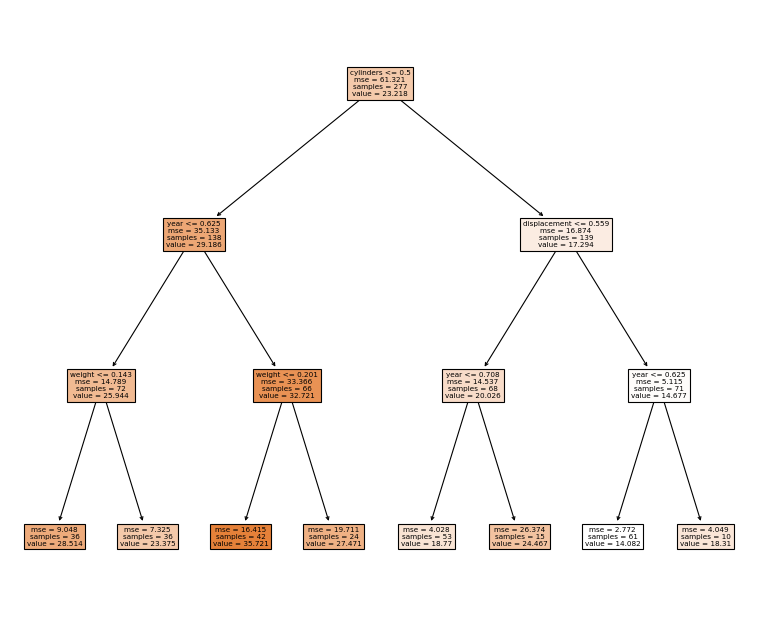

In [11]:
plt.figure(figsize=(12, 10), dpi=80)
tree.plot_tree(auto_tree,
           feature_names = ['cylinders','displacement','horsepower','weight','acceleration','year'], 
           class_names='mpg',
           filled = True);

Der score, der bei der Methode automatisch ausgegeben werden kann ist der $R^2$-score.

Aus der Hilfe: 

The $\textbf{coefficient of determination}$ 
$R^2$
 is defined as $(1−\frac{u}{v})$, where $u$ is the residual sum of squares ((y_true - y_pred)** 2).sum() and   
$v$ is the total sum of squares ((y_true - y_true.mean()) ** 2).sum().  
The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).  
A constant model that always predicts the expected value of y, disregarding the input features, would get a 
$R^2$ score of 0.0.


In [12]:
auto_tree.score(X_test, y_test, sample_weight=None)

0.814292000074819

## 6.1.2) Feature Importance für die Variablenselektion

Die Entscheidungsregeln im Baum sind bekannt. damit läßt sich auch ein Ranking der Input-Features ableiten.  
Die ausgegebenen "importance scores" basieren auf der Größe der Reduktion des Kriteriums, das benutzt wurde um die  split points zu wählen.  
Im Falle von Regression Trees ist das der RMSE, bei Klassifikation der Gini-Index oder die Entropie.  

Das Feature, das am meisten zur Reduktion beiträgt bekommt den größten Importance Score:


In [13]:
feat_importance = auto_tree.tree_.compute_feature_importances(normalize=True)

#Wichtigkeit der einzelnen Prädiktor-Variablen:

print('FeatureImportance (in Prozent):','\n'
'cylinders:',feat_importance[0],'\n'
'displacement:',feat_importance[1],'\n'
'horsepower:',feat_importance[2],'\n'
'weight:',feat_importance[3],'\n'
'acceleration:',feat_importance[4],'\n'
'year:',feat_importance[5])


FeatureImportance (in Prozent): 
cylinders: 0.6792817693531488 
displacement: 0.0689411458280659 
horsepower: 0.0 
weight: 0.10509734301032958 
acceleration: 0.0 
year: 0.14667974180845572


### Aufgabe 1) 

- Variieren Sie die Tiefe des Baumes in einer Schleife und stellen Sie Trainings-und Testfehler für die unterschiedlichen Tiefen in einer Graphik dar.
- Ab wann gibt es overfitting bzw. was ist die optimale Tiefe?
- Ergibt sich das gleiche Ergebnis, wenn man als Entscheidungsktiterium den r2-score verwendet?

## 6.1.3) Pruning

In der Vorlesung haben wir schon besprochen, daß Decision Trees zum Overfitting neigen.  
Eine Lösung ist, den Tree zu verkleinern. Das Pruning mit Hilfe eines Penalty Termes $\alpha \vert T \vert$, der zu viel Komplexität im Baum bestraft, ist eine Möglichkeit dafür. 

$\sum_{m=1}^{\vert T \vert} \sum_{x_i\in R_m} (y_i-\hat{y_{Rm}})^2+\alpha \vert T \vert$

In Python gibt es dafür die Funktion "cost_complexity_pruning_path"
Dabei wird der Parameter $\alpha$ variiert und der jeweils beste Baum ausgegeben.

In [14]:
Auto_DT= DecisionTreeRegressor(random_state=0)
path =Auto_DT.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Gesamte Unreinheit vs effektives alpha (Training)')

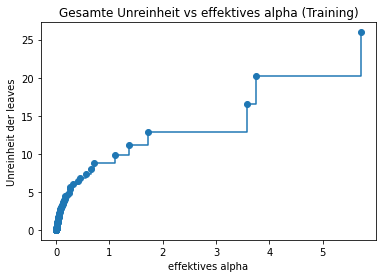

In [15]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effektives alpha")
ax.set_ylabel("Unreinheit der leaves")
ax.set_title("Gesamte Unreinheit vs effektives alpha (Training)")

In [16]:
Auto_DTs = []
for ccp_alpha in ccp_alphas:
    Auto_DT = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    Auto_DT.fit(X_train, y_train)
    Auto_DTs.append(Auto_DT)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        Auto_DTs[-1].tree_.node_count, ccp_alphas[-1]
    )
)


Number of nodes in the last tree is: 1 with ccp_alpha: 35.350071086306244


der letzte Baum ist also der triviale Baum mit nur noch einem Node.  
Für die weiteren Auswertungen kann man den (oder die ersten paar) auch weglassen.

In [17]:
Auto_DTs = Auto_DTs[:-1]
ccp_alphas = ccp_alphas[:-1]

Jetzt kann man sich die scores ausgeben lassen um das optimale $\alpha$ zu finden (sh. Algorithmus aus der Vorlesung)

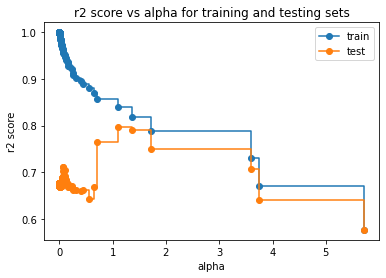

In [18]:
train_scores = [Auto_DT.score(X_train, y_train) for Auto_DT in Auto_DTs]
test_scores = [Auto_DT.score(X_test, y_test) for Auto_DT in Auto_DTs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("r2 score")
ax.set_title("r2 score vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

für sehr komplexe Bäume (kleines $\alpha$) ist der r2-score auf der Trainingsmenge fast 1 der Test-score aber klein.  
Das heißt, das Modell ist im Overfitting. Wird die Komplexität niedriger sinkt der score auf der Trainingsmenge, steigt aber auf den Testdaten.  
Das Modell generalisiert besser.

In [19]:
max_test_score=np.max(test_scores)
index_max_test=test_scores.index(max_test_score)
print('maximaler r2 score (test):',max_test_score,'; Position Max:',index_max_test)

maximaler r2 score (test): 0.7968886973511533 ; Position Max: 188


der zugehörige $\alpha$-Wert ist dann

In [20]:
ccp_alphas[index_max_test]

1.0953882762492846

jetzt können wir den optimalen Baum für unsere Aufgabe auswählen:

In [21]:
Auto_DT_opt=DecisionTreeRegressor(ccp_alpha=ccp_alphas[index_max_test])
Auto_DT_opt.fit(X_train,y_train)

y_hat_train_opt = Auto_DT_opt.predict(X_train)
y_hat_test_opt = Auto_DT_opt.predict(X_test)

In [22]:
rmseTree_tr_opt = sqrt(mean_squared_error(y_hat_train_opt,y_train)) 
rmseTree_test_opt = sqrt(mean_squared_error(y_hat_test_opt,y_test)) 

print('Trainingsfehler (pruned):',rmseTree_tr_opt,'; Trainingsfehler (simple)',rmseTree_tr)
print('Testfehler (pruned):',rmseTree_test_opt,'; Testfehler (simple)',rmseTree_test)

Trainingsfehler (pruned): 3.1360255770313232 ; Trainingsfehler (simple) 3.046341860534951
Testfehler (pruned): 3.4874081768779535 ; Testfehler (simple) 3.3346560225174073


### Aufgabe 2)

- bestimmen Sie die Feature Importance des geprunten Baumes.
- Vergleichen Sie das Ergebnis mit dem besten Baum aus Aufgabe 1).  
Gibt es Unterschiede?

## 6.2) Decision-Trees für die Klassifikation

Wir verwenden als Beispiel den schon bekannten Datensatz zu den Herzinfarkten:

In [23]:
Heart = pd.read_csv("../Daten/heart.csv")
#len(Heart)
Heart.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0,normal,No


Der sklearn Tree-Classifier kann nur mit numerischen Features umgehen, nicht mit kategorialen.
Wir verwenden also nur die numerischen Inputs (ansonsten könnte man die anderen one-Hot kodieren).

In [24]:
Heart_y=Heart['AHD']
Heart_X=np.array(Heart[['Age','Sex','RestBP','Chol','Fbs','RestECG','MaxHR','ExAng','Oldpeak','Slope']])


Heart_y=np.array(Heart_y.replace(['No', 'Yes'], [0,1]))
#Heart_y

Train-test-Split:

In [25]:
 X_train_H, X_test_H, y_train_H, y_test_H = train_test_split(Heart_X, Heart_y, test_size=0.3, shuffle='True')

Modell definieren und trainieren: 

In [26]:
from sklearn.tree import DecisionTreeClassifier

# Modell spezifizieren (max. Tiefe = 3)
# Entscheidungskriterium ist im default 'gini' (sonst 'entropy' wählen)

heart_tree=DecisionTreeClassifier(max_depth=3,criterion='gini') 

# Modell an die Trainingsdaten anpassen
heart_tree.fit(X_train_H,y_train_H)

DecisionTreeClassifier(max_depth=3)

jetzt kann man die Predictions machen lassen:

In [27]:
y_hat_tr_H = heart_tree.predict(X_train_H)
y_hat_test_H = heart_tree.predict(X_test_H)

y_hat_test_H

array([1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0])

Für die Prognosen kann man alle schon bekannten Auswertungen für Classifier machen:  

    - accuracy auswerten (Hit-Rate)  
    - Confusion Matrix ausgeben lassen  
    - detaillierten Report ausgeben lassen  

In [28]:
heart_score = accuracy_score(y_hat_test_H, y_test_H)
heart_score

0.7444444444444445

In [29]:
heart_tr_score=heart_tree.score(X_train_H, y_train_H, sample_weight=None)
heart_test_score=heart_tree.score(X_test_H, y_test_H, sample_weight=None)

print('Trainings-Score:',heart_tr_score,'; Test-Score:',heart_test_score)

Trainings-Score: 0.8095238095238095 ; Test-Score: 0.7444444444444445


In [30]:
print('Confusion matrix:\n', confusion_matrix(y_test_H, y_hat_test_H))

Confusion matrix:
 [[36  8]
 [15 31]]


In [31]:
print(classification_report(y_test_H, y_hat_test_H, digits=4))

              precision    recall  f1-score   support

           0     0.7059    0.8182    0.7579        44
           1     0.7949    0.6739    0.7294        46

    accuracy                         0.7444        90
   macro avg     0.7504    0.7460    0.7437        90
weighted avg     0.7514    0.7444    0.7433        90



Die Baumstruktur kann wieder graphisch dargestellt werden:

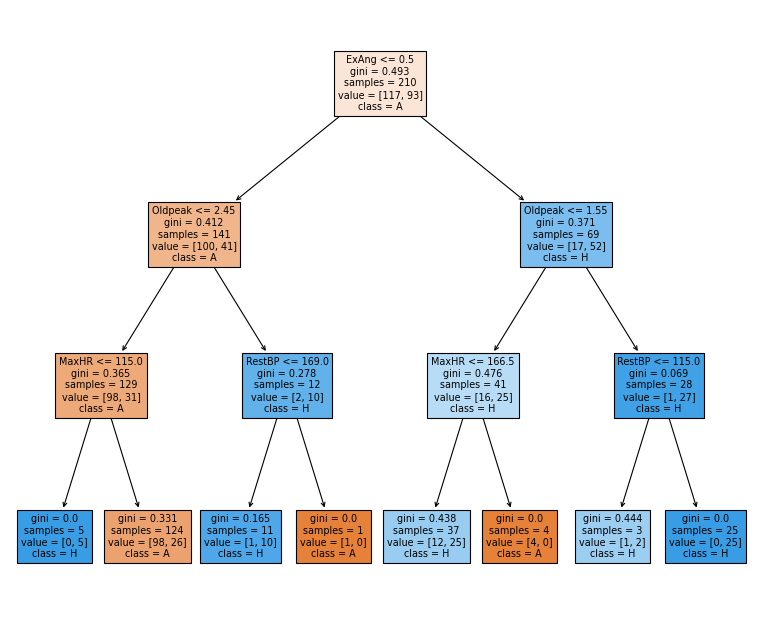

In [32]:
plt.figure(figsize=(12, 10), dpi=80)
tree.plot_tree(heart_tree,
           feature_names = ['Age','Sex','RestBP','Chol','Fbs','RestECG','MaxHR','ExAng','Oldpeak','Slope'], 
           class_names='AHD',
           filled = True);

Die Feature Importance wird mit Hilfe des Gini-Index oder der Entropie bestimmt (je nachdem, was zum Lernen des Baumes benutzt wurde):

In [33]:
feat_importance_heart = heart_tree.tree_.compute_feature_importances(normalize=True)

#Wichtigkeit der einzelnen Prädiktor-Variablen:

feat_importance_heart

array([0.        , 0.        , 0.04889228, 0.        , 0.        ,
       0.        , 0.21545653, 0.45985832, 0.27579287, 0.        ])

In [34]:
print('FeatureImportance (in Prozent):')

print('Age',feat_importance_heart[0],'\n' 
      'Sex',feat_importance_heart[1],'\n'
      'RestBP',feat_importance_heart[2],'\n' 
      'Chol',feat_importance_heart[3],'\n' 
      'Fbs',feat_importance_heart[4],'\n' 
      'RestECG',feat_importance_heart[5],'\n' 
      'MaxHR',feat_importance_heart[6],'\n' 
      'ExAng',feat_importance_heart[7],'\n'
      'Oldpeak',feat_importance_heart[8],'\n'
      'Slope' ,feat_importance_heart[9])



FeatureImportance (in Prozent):
Age 0.0 
Sex 0.0 
RestBP 0.048892280372243496 
Chol 0.0 
Fbs 0.0 
RestECG 0.0 
MaxHR 0.21545653124008118 
ExAng 0.4598583162903847 
Oldpeak 0.2757928720972905 
Slope 0.0


### Aufgabe 3)

- variieren Sie die Tiefe des Baumes in einer Schleife und finden Sie die optimale Tiefe für die das Overfitting minimal wird
- benutzen Sie Pruning um den Baum anzupassen. Ist die accuracy besser als bei der Variante von oben?
- welche 'feature importance' ergibt sich für den besten Baum aus Teil 1) und Teil 2)?  
Gibt es Unterschiede?